In [ ]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# importing data
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# test's dimensions are (1155, 785) and train's dimensions are (574, 785)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2    143
7    122
4    117
0    116
9    111
6    109
8    109
1    108
5    105
3    102
Name: label, dtype: int64

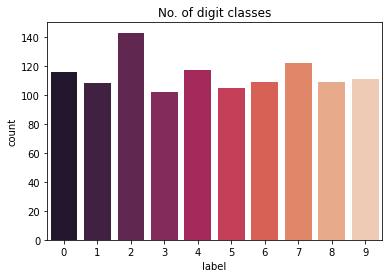

In [ ]:
# visualizing no of classes + counts
sns.countplot(train["label"])

plt.plot(figure = (10,10))
g = sns.countplot( train["label"], palette = 'rocket')
plt.title('No. of digit classes')
train.label.astype('category').value_counts()

In [ ]:
# rescaling data + normalizing it
x = train.drop(columns = 'label')
y = train['label']

x = x/255.0
test = test/255.0

print("x:", x.shape)
print("test_data:", test.shape)

x: (1142, 784)
test_data: (571, 784)


In [ ]:
# scaling + train test split
x_scaled = scale(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [ ]:
# building a non-linear model
model_nl = SVC(kernel='rbf')
model_nl.fit(x_train, y_train)
y_pred = model_nl.predict(x_test)

In [ ]:
# confusion matrix + model accuracy
print("A non-linear model's accuracy is: ")
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

A non-linear model's accuracy is: 
0.7259475218658892
[[30  0  1  0  0  0  0  0  0  0]
 [ 0 20  2  0  0  0  0  0  1  0]
 [ 0  0 40  0  0  0  0  0  2  0]
 [ 0  1  8 20  0  1  0  0  5  0]
 [ 0  0  4  0 29  0  0  0  0  1]
 [ 0  1  9  1  1 11  1  0 10  0]
 [ 1  0  2  0  0  0 23  0  1  0]
 [ 0  3 10  0  1  0  0 32  1  2]
 [ 0  1  1  0  0  0  0  0 27  1]
 [ 0  1  3  0  6  0  0 11  0 17]]


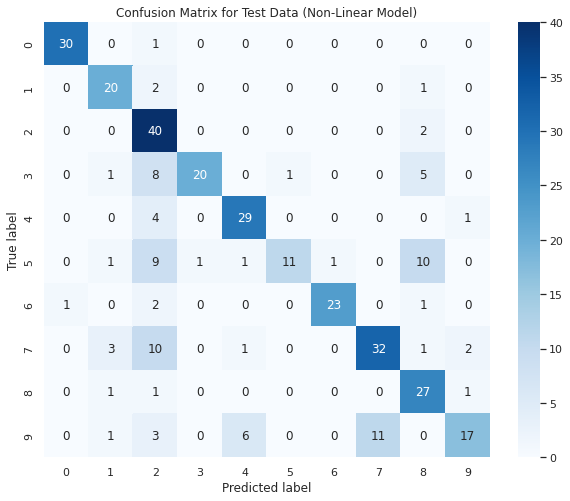

In [ ]:
# visualising the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(10, 8)})
cm = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

_ = cm.set_ylabel('True label')
_ = cm.set_xlabel('Predicted label')
_ = cm.set_title("Confusion Matrix for Test Data (Non-Linear Model)")

A non-linear model's accuracy is 89%.

In [ ]:
# hyperparameter tuning of the non-linear model

# 5 fold cross-validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]

# non-linear model
model = SVC(kernel="rbf")
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020473,0.002333,0.005791,0.000846,5,0.01,"{'C': 5, 'gamma': 0.01}",0.304348,0.260870,0.260870,...,0.289662,0.036727,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.018038,0.002296,0.006375,0.002092,5,0.001,"{'C': 5, 'gamma': 0.001}",0.826087,0.739130,0.695652,...,0.763285,0.043639,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.014805,0.000626,0.006121,0.001728,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.652174,0.652174,0.652174,...,0.689082,0.045746,4,0.851648,0.879121,0.857143,0.874317,0.885246,0.869495,0.012923
3,0.017989,0.000249,0.005336,0.000077,10,0.01,"{'C': 10, 'gamma': 0.01}",0.304348,0.260870,0.260870,...,0.289662,0.036727,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.019742,0.004722,0.005898,0.001250,10,0.001,"{'C': 10, 'gamma': 0.001}",0.826087,0.739130,0.695652,...,0.767729,0.045959,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.014612,0.000955,0.005758,0.001025,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.760870,0.760870,0.652174,...,0.737005,0.044747,3,0.967033,0.950549,0.983516,0.961749,0.961749,0.964919,0.010742


In [ ]:
svm = SVC(kernel="rbf")
scores = cross_val_score(svm, x_train, y_train, cv=5, scoring='accuracy')

In [ ]:
scores

array([0.7173913 , 0.73913043, 0.73913043, 0.55555556, 0.75555556])

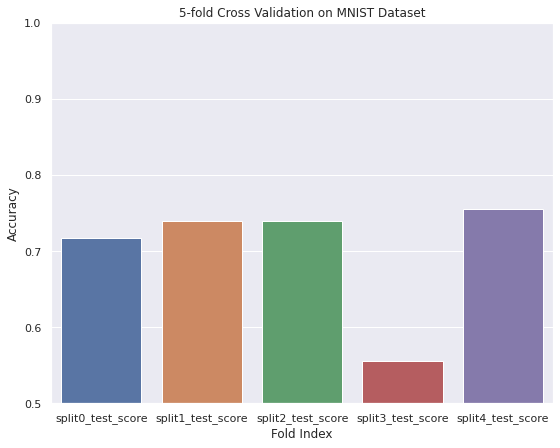

In [ ]:
sns.set()

bar = sns.barplot(x=['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'],y=scores)
bar.set_ylim([0.5, 1])
bar.set_title("5-fold Cross Validation on MNIST Dataset")
bar.set_ylabel("Accuracy")
_= bar.set_xlabel("Fold Index")

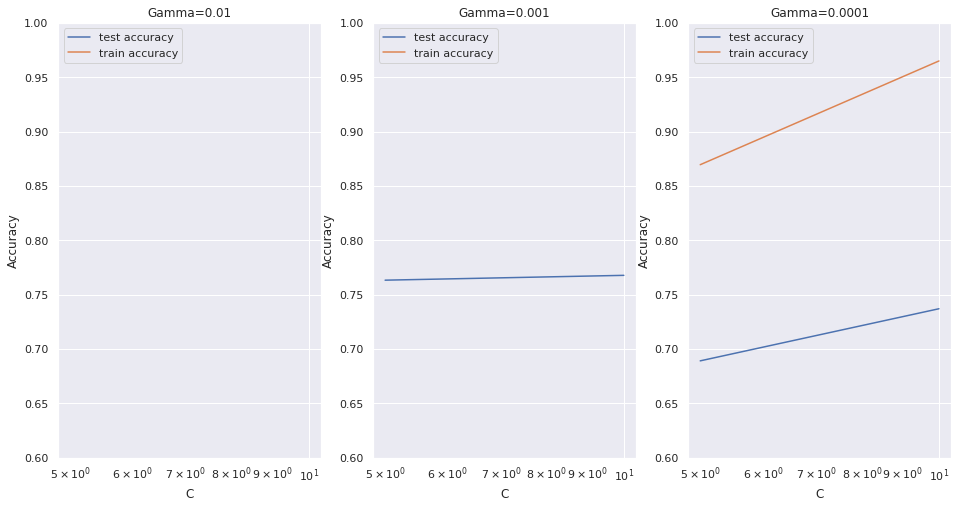

In [ ]:
# choosing optimal gamma
cv_results['param_C'] = cv_results['param_C'].astype('int')

# plotting
plt.figure(figsize=(16,8))
plt.subplot(131)

# plot 1/3
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# plot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# plot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
# checking for optimal c and gamma

best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7677294685990338 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [ ]:
# final model
final = SVC(C=10, gamma=0.001, kernel="rbf")
final.fit(x_train, y_train)
y_pred = final.predict(x_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

Accuracy:  0.7900874635568513 

[[30  0  1  0  0  0  0  0  0  0]
 [ 0 20  1  0  0  0  1  0  1  0]
 [ 0  0 38  1  0  0  0  0  3  0]
 [ 0  0  3 29  0  1  0  0  1  1]
 [ 0  0  4  0 28  0  0  0  0  2]
 [ 0  1  4  1  0 22  1  0  5  0]
 [ 1  0  2  0  0  0 23  0  1  0]
 [ 0  2  8  0  1  0  0 35  1  2]
 [ 0  1  1  0  0  0  0  0 27  1]
 [ 0  1  2  0  6  0  0 10  0 19]] 



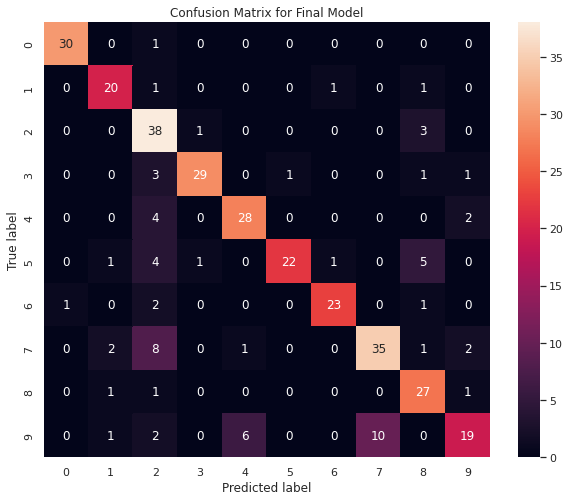

In [ ]:
# visualising the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(10, 8)})
cm = sns.heatmap(cm, annot=True, fmt='g')

_ = cm.set_ylabel('True label')
_ = cm.set_xlabel('Predicted label')
_ = cm.set_title("Confusion Matrix for Final Model")